In [132]:
import mlrose_hiive as mlrose

# import mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

from pandas import DataFrame


import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

import time

In [2]:
# Load dataset
#df = pd.read_csv('../input/ucidata/crx.data',header=None)
header_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
df = pd.read_csv('../Data/crx.data',names=header_names)

# Inspect data
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df = df.replace('?',np.nan)

In [4]:
def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the previous row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='ffill')  
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean 
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)    


In [5]:
fix_missing_ffill(df,'A')
fix_missing_ffill(df,'B')
fix_missing_ffill(df,'D')
fix_missing_ffill(df,'E')
fix_missing_ffill(df,'F')
fix_missing_ffill(df,'G')
fix_missing_mean(df,'N')

# Separate target from features
y = df['P']
features = df
features = features.drop(['P'], axis=1)
# Preview features
features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


In [ ]:
y = y.replace('+', 1.0)
y = y.replace('-', 0.0)

In [7]:
# List of categorical columns
object_cols = ['A','B','D','E','F','G','I','J','L','M','N']

# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Preview the ordinal-encoded features
X.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,156.0,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,69.0,0
1,0.0,328.0,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,89.0,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,97.0,824
3,1.0,125.0,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,43.0,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.20,random_state=2)

In [9]:
# xTrain_norm = (xTrain-xTrain.min())/(xTrain.max()-xTrain.min())
# xTest_norm = (xTest-xTest.min())/(xTest.max()-xTest.min())

# Normalize feature data
scaler = MinMaxScaler()

xTrain_norm = scaler.fit_transform(xTrain)
xTest_norm = scaler.fit_transform(xTest)

In [58]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,28, 20),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf.fit(xTrain_norm, yTrain)
mlp_clf.score(xTest_norm,yTest)
fitness_curve1 = mlp_clf.loss_curve_

In [222]:
time1 = time.time()
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='gradient_descent', curve = True,
                                 max_iters = 500, bias = True, is_classifier = True, 
                                 learning_rate = 5.99484250e-04, early_stopping = True, 
                                 clip_max = 1, max_attempts = 100, random_state = 3)

nn_model1.fit(xTrain_norm, yTrain)

y_train_pred1 = nn_model1.predict(xTrain_norm)

y_train_accuracy1 = accuracy_score(yTrain, y_train_pred1)

print(y_train_accuracy1)

y_test_pred1 = nn_model1.predict(xTest_norm)

y_test_accuracy1 = accuracy_score(yTest, y_test_pred1)

print(y_test_accuracy1)
time2 = time.time()
print('time: ', time2-time1)

fitness_curve1 = nn_model1.fitness_curve
# print(type(fitness_curve1))
# fitness_curve1a = fitness_curve1[:, 0]
# fitness_curve1b = fitness_curve1[:, 1]
# plt.plot(range(len(fitness_curve1)), fitness_curve1a)

0.927536231884058
0.8840579710144928
time:  2.577181816101074


In [221]:
time1 = time.time()
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='random_hill_climb', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 2, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model2.fit(xTrain_norm, yTrain)

y_train_pred2 = nn_model2.predict(xTrain_norm)

y_train_accuracy2 = accuracy_score(yTrain, y_train_pred2)

print(y_train_accuracy2)

y_test_pred2 = nn_model2.predict(xTest_norm)

y_test_accuracy2 = accuracy_score(yTest, y_test_pred2)

print(y_test_accuracy2)
time2 = time.time()
print('time: ', time2-time1)

fitness_curve2 = nn_model2.fitness_curve
fitness_curve2a = fitness_curve2[:, 0]
fitness_curve2b = fitness_curve2[:, 1]
# plt.plot(range(len(fitness_curve2)), fitness_curve2a)

0.8641304347826086
0.8188405797101449
time:  2.1541199684143066


In [226]:
time1 = time.time()
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='simulated_annealing', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 1, early_stopping = True, restarts = 0,
                                 clip_max = 3, max_attempts = 100, random_state = 1)

nn_model3.fit(xTrain_norm, yTrain)

y_train_pred3 = nn_model3.predict(xTrain_norm)

y_train_accuracy3 = accuracy_score(yTrain, y_train_pred3)

print(y_train_accuracy3)

y_test_pred3 = nn_model3.predict(xTest_norm)

y_test_accuracy3 = accuracy_score(yTest, y_test_pred3)

print(y_test_accuracy3)
time2 = time.time()
print('time: ', time2-time1)

fitness_curve3 = nn_model3.fitness_curve
fitness_curve3a = fitness_curve3[:, 0]
fitness_curve3b = fitness_curve3[:, 1]
# plt.plot(range(len(fitness_curve3)), fitness_curve3a)

0.8097826086956522
0.782608695652174
time:  2.7521259784698486


In [219]:
time1 = time.time()
nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='genetic_alg', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 1, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model4.fit(xTrain_norm, yTrain)

y_train_pred4 = nn_model4.predict(xTrain_norm)

y_train_accuracy4 = accuracy_score(yTrain, y_train_pred4)

print(y_train_accuracy4)

y_test_pred4 = nn_model4.predict(xTest_norm)

y_test_accuracy4 = accuracy_score(yTest, y_test_pred4)

print(y_test_accuracy4)

time2 = time.time()
print('time: ', time2-time1)

fitness_curve4 = nn_model4.fitness_curve
fitness_curve4a = fitness_curve4[:, 0]
fitness_curve4b = fitness_curve4[:, 1]
# plt.plot(range(len(fitness_curve4)), fitness_curve4a)

0.8405797101449275
0.8260869565217391
time:  58.88077902793884


In [231]:
print(fitness_curve4[-1, 1])

29754.0


(0.0, 2.0)

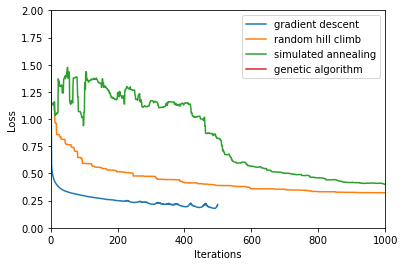

In [218]:
plt.plot(range(len(fitness_curve1)), -fitness_curve1, label='gradient descent')
plt.plot(range(len(fitness_curve2)), fitness_curve2a, label='random hill climb')
plt.plot(range(len(fitness_curve3)), fitness_curve3a, label='simulated annealing')
plt.plot(range(len(fitness_curve4)), fitness_curve4a, label='genetic algorithm')
plt.legend()
plt.xlim([0, 1000])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.ylim([0, 2])


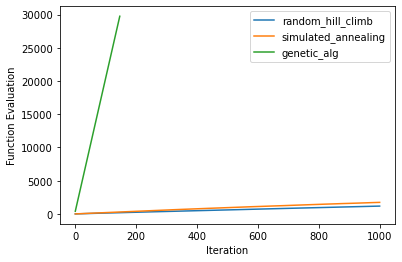

In [224]:
# plt.plot(range(len(fitness_curve1)), fitness_curve1, label='gradient_descent')
plt.plot(range(len(fitness_curve2)), fitness_curve2b, label='random_hill_climb')
plt.plot(range(len(fitness_curve3)), fitness_curve3b, label='simulated_annealing')
plt.plot(range(len(fitness_curve4)), fitness_curve4b, label='genetic_alg')
plt.xlabel('Iteration')
plt.ylabel("Function Evaluation")
plt.legend()

In [176]:
np.logspace(-5, -1, num=10)

array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])

In [192]:
lr1 = np.logspace(-5, -1, num=10)
lr2 = range(1, 11)


m1a = []
m1b = []
m1c = []
m2a = []
m2b = []
m2c = []
m3a = []
m3b = []
m3c = []
m4a = [0.841] * len(lr)
m4b = [0.826] * len(lr)

for l in lr1:
    time1 = time.time()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='gradient_descent', curve = True,
                                 max_iters = 500, bias = True, is_classifier = True, 
                                 learning_rate = l, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

    nn_model1.fit(xTrain_norm, yTrain)

    y_train_pred1 = nn_model1.predict(xTrain_norm)

    y_train_accuracy1 = accuracy_score(yTrain, y_train_pred1)

    m1a.append(y_train_accuracy1)

    y_test_pred1 = nn_model1.predict(xTest_norm)

    y_test_accuracy1 = accuracy_score(yTest, y_test_pred1)

    m1b.append(y_test_accuracy1)
    time2 = time.time()
    m1c.append(time2-time1)
    
for l in lr2:
    time1 = time.time()
    nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                     algorithm ='random_hill_climb', curve = True,
                                     max_iters = 1000, bias = True, is_classifier = True, 
                                     learning_rate = l, early_stopping = True, restarts = 0,
                                     clip_max = 5, max_attempts = 50, random_state = 1)

    nn_model2.fit(xTrain_norm, yTrain)

    y_train_pred2 = nn_model2.predict(xTrain_norm)

    y_train_accuracy2 = accuracy_score(yTrain, y_train_pred2)

    m2a.append(y_train_accuracy2)

    y_test_pred2 = nn_model2.predict(xTest_norm)

    y_test_accuracy2 = accuracy_score(yTest, y_test_pred2)

    m2b.append(y_test_accuracy2)
    time2 = time.time()
    m2c.append(time2-time1)
    
    time1 = time.time()
    nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='simulated_annealing', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = l, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 50, random_state = 1)

    nn_model3.fit(xTrain_norm, yTrain)

    y_train_pred3 = nn_model3.predict(xTrain_norm)

    y_train_accuracy3 = accuracy_score(yTrain, y_train_pred3)

    m3a.append(y_train_accuracy3)

    y_test_pred3 = nn_model3.predict(xTest_norm)

    y_test_accuracy3 = accuracy_score(yTest, y_test_pred3)

    m3b.append(y_test_accuracy3)
    time2 = time.time()
    m3c.append(time2-time1)
    
#     nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
#                                  algorithm ='genetic_alg', curve = True,
#                                  max_iters = 1000, bias = True, is_classifier = True, 
#                                  learning_rate = l, early_stopping = True, restarts = 0,
#                                  clip_max = 5, max_attempts = 30, random_state = 1)

#     nn_model4.fit(xTrain_norm, yTrain)

#     y_train_pred4 = nn_model4.predict(xTrain_norm)

#     y_train_accuracy4 = accuracy_score(yTrain, y_train_pred4)

#     m4a.append(y_train_accuracy4)

#     y_test_pred4 = nn_model4.predict(xTest_norm)

#     y_test_accuracy4 = accuracy_score(yTest, y_test_pred4)

#     m4b.append(y_test_accuracy4)

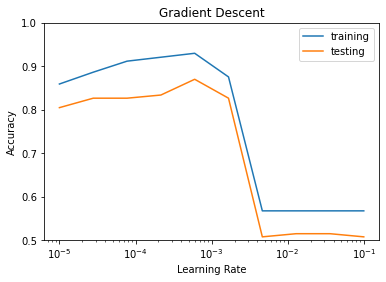

In [193]:
plt.plot(lr1, m1a, label = 'training')
plt.plot(lr1, m1b, label = 'testing')
plt.ylim([0.5, 1])
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title("Gradient Descent")
# plt.plot(lr, m4a, label = 'genetic algorithm')
plt.legend()

Text(0.5, 1.0, 'Randomized Hill Climbing')

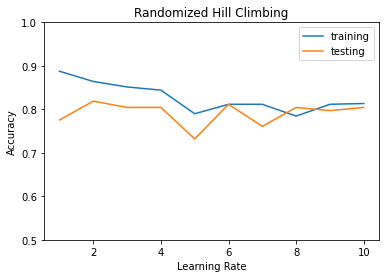

In [194]:
plt.plot(lr, m2a, label = 'training')
plt.plot(lr, m2b, label = 'testing')
plt.ylim([0.5, 1])
# plt.plot(lr, m4a, label = 'genetic algorithm')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title("Randomized Hill Climbing")

Text(0.5, 1.0, 'Simulated Annealing')

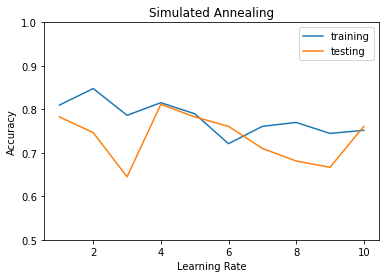

In [195]:
plt.plot(lr, m3a, label = 'training')
plt.plot(lr, m3b, label = 'testing')
plt.legend()
plt.ylim([0.5, 1])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title("Simulated Annealing")
# plt.plot(lr, m4b, label = 'genetic algorithm')

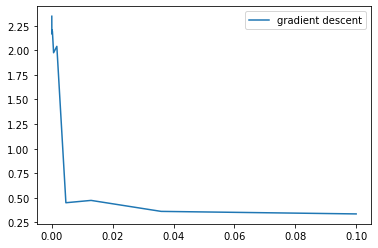

In [169]:
plt.plot(lr1, m1c, label = 'gradient descent')
# plt.plot(lr2, m2c, label = 'random hill climb')
# plt.plot(lr2, m3c, label = 'simulated annealing')
# plt.xscale('log')
# plt.xticks(lr1+lr2)
plt.legend()

In [181]:
clips = range(1, 7)

m1a = []
m1b = []
m1c = []
m2a = []
m2b = []
m2c = []
m3a = []
m3b = []
m3c = []
m4a = []
m4b = []

for c in clips:
    print(c)
    time1 = time.time()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='gradient_descent', curve = True,
                                 max_iters = 500, bias = True, is_classifier = True, 
                                 learning_rate = 5.99484250e-04, early_stopping = True, 
                                 clip_max = c, max_attempts = 100, random_state = 3)

    nn_model1.fit(xTrain_norm, yTrain)

    y_train_pred1 = nn_model1.predict(xTrain_norm)

    y_train_accuracy1 = accuracy_score(yTrain, y_train_pred1)

    m1a.append(y_train_accuracy1)

    y_test_pred1 = nn_model1.predict(xTest_norm)

    y_test_accuracy1 = accuracy_score(yTest, y_test_pred1)

    m1b.append(y_test_accuracy1)
    time2 = time.time()
    m1c.append(time2-time1)
    
    time1 = time.time()
    nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                     algorithm ='random_hill_climb', curve = True,
                                     max_iters = 1000, bias = True, is_classifier = True, 
                                     learning_rate = 2, early_stopping = True, restarts = 0,
                                     clip_max = c, max_attempts = 50, random_state = 1)

    nn_model2.fit(xTrain_norm, yTrain)

    y_train_pred2 = nn_model2.predict(xTrain_norm)

    y_train_accuracy2 = accuracy_score(yTrain, y_train_pred2)

    m2a.append(y_train_accuracy2)

    y_test_pred2 = nn_model2.predict(xTest_norm)

    y_test_accuracy2 = accuracy_score(yTest, y_test_pred2)

    m2b.append(y_test_accuracy2)
    time2 = time.time()
    m2c.append(time2-time1)
    
    time1 = time.time()
    nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='simulated_annealing', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 1, early_stopping = True, restarts = 0,
                                 clip_max = c, max_attempts = 50, random_state = 1)

    nn_model3.fit(xTrain_norm, yTrain)

    y_train_pred3 = nn_model3.predict(xTrain_norm)

    y_train_accuracy3 = accuracy_score(yTrain, y_train_pred3)

    m3a.append(y_train_accuracy3)

    y_test_pred3 = nn_model3.predict(xTest_norm)

    y_test_accuracy3 = accuracy_score(yTest, y_test_pred3)

    m3b.append(y_test_accuracy3)
    time2 = time.time()
    m3c.append(time2-time1)
    
    nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='genetic_alg', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 1, early_stopping = True, restarts = 0,
                                 clip_max = c, max_attempts = 30, random_state = 1)

    nn_model4.fit(xTrain_norm, yTrain)

    y_train_pred4 = nn_model4.predict(xTrain_norm)

    y_train_accuracy4 = accuracy_score(yTrain, y_train_pred4)

    m4a.append(y_train_accuracy4)

    y_test_pred4 = nn_model4.predict(xTest_norm)

    y_test_accuracy4 = accuracy_score(yTest, y_test_pred4)

    m4b.append(y_test_accuracy4)

1
2
3
4
5
6


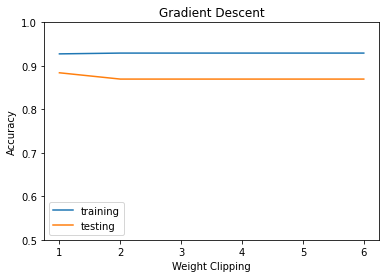

In [190]:
plt.plot(clips, m1a, label = 'training')
plt.plot(clips, m1b, label = 'testing')
plt.ylim([0.5, 1])
plt.xlabel('Weight Clipping')
plt.ylabel('Accuracy')
plt.title("Gradient Descent")
plt.legend()

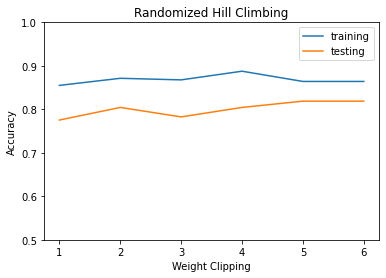

In [189]:
plt.plot(clips, m2a, label = 'training')
plt.plot(clips, m2b, label = 'testing')
plt.ylim([0.5, 1])
plt.xlabel('Weight Clipping')
plt.ylabel('Accuracy')
plt.title("Randomized Hill Climbing")
plt.legend()

Text(0.5, 1.0, 'Simulated Annealing')

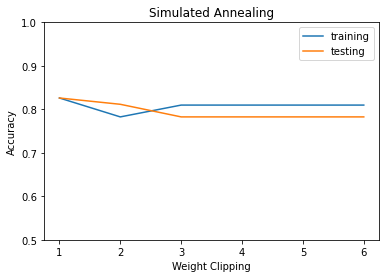

In [188]:
plt.plot(clips, m3a, label = 'training')
plt.plot(clips, m3b, label = 'testing')
plt.legend()
plt.ylim([0.5, 1])
plt.xlabel('Weight Clipping')
plt.ylabel('Accuracy')
plt.title("Simulated Annealing")

Text(0.5, 1.0, 'Genetic Algorithm')

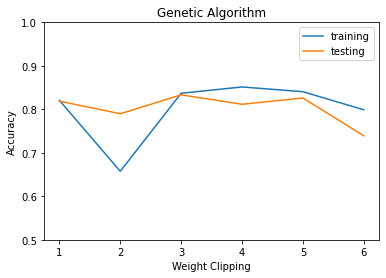

In [191]:
plt.plot(clips, m4a, label = 'training')
plt.plot(clips, m4b, label = 'testing')
plt.legend()
plt.ylim([0.5, 1])
plt.xlabel('Weight Clipping')
plt.ylabel('Accuracy')
plt.title("Genetic Algorithm")